In [1]:
import pandas as pd
pd.show_versions()


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.12.5.final.0
python-bits           : 64
OS                    : Windows
OS-release            : 11
Version               : 10.0.26100
machine               : AMD64
processor             : Intel64 Family 6 Model 183 Stepping 1, GenuineIntel
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : English_United States.1252

pandas                : 2.2.2
numpy                 : 2.0.1
pytz                  : 2024.1
dateutil              : 2.9.0.post0
setuptools            : 72.1.0
pip                   : 25.0.1
Cython                : None
pytest                : None
hypothesis            : None
sphinx                : None
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.3.0
html5lib              : 1.1
pymysql               : None
psycopg2  

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.array([50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100])
x_reshape = x.reshape((-1, 1))
y = np.array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3, 3.1, 2.8, 3.3, 3.5, 3])

In [3]:
model = LinearRegression()
model.fit(x_reshape, y)

LinearRegression()

In [4]:
r_sq = model.score(x_reshape, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_[0]}")

coefficient of determination: 0.09241764560913446
intercept: 2.306306306306306
slope: 0.006756756756756759


##### Y Pred

In [6]:
y_pred = model.predict(x_reshape)
print(f"predicted response:\n{y_pred}")

predicted response:
[2.64414414 2.64414414 2.64414414 2.77927928 2.77927928 2.77927928
 2.84684685 2.84684685 2.84684685 2.91441441 2.91441441 2.91441441
 2.98198198 2.98198198 2.98198198]


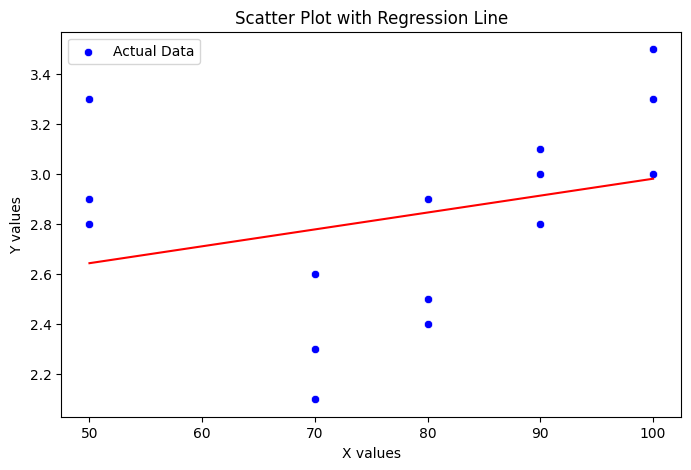

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x, y=y, label="Actual Data", color="blue")
plt.plot(x, y_pred, color="red")  # Regression line

# Labels & Title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter Plot with Regression Line")
plt.legend()
plt.show()

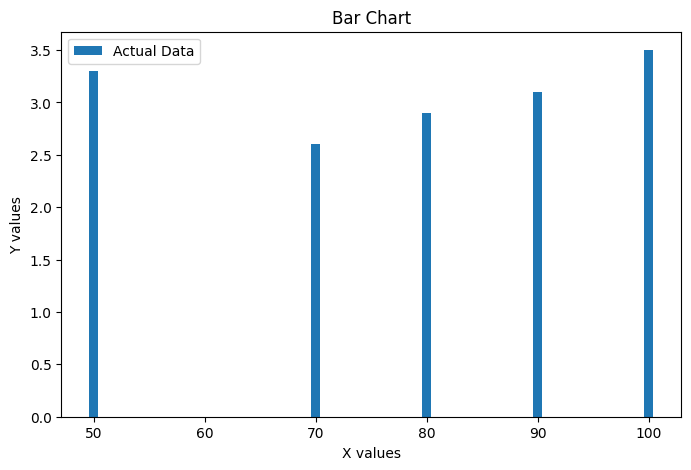

In [17]:
plt.figure(figsize=(8, 5))
plt.bar(x=x, height=y, label="Actual Data")  # Regression line
# plt.bar(x=x.flatten(), height=y_pred, label="Pred Data")
# Labels & Title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Bar Chart")
plt.legend()
plt.show()

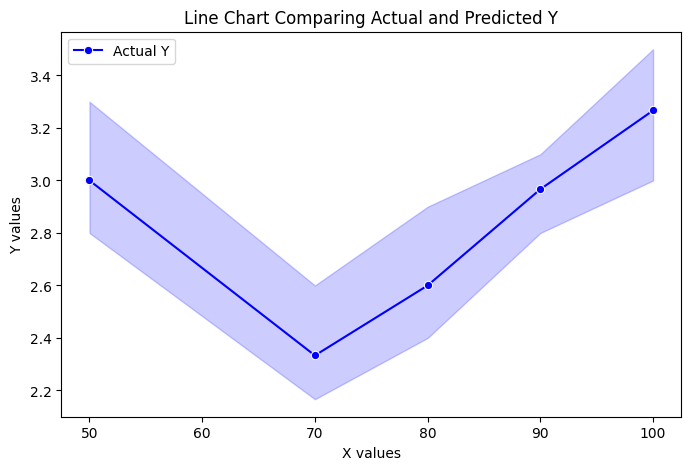

In [18]:
plt.figure(figsize=(8, 5))
# Plot actual data points
sns.lineplot(x=x, y=y, marker="o", label="Actual Y", color="blue")

# Plot predicted line
# sns.lineplot(x=x, y=y_pred, label="Predicted Y (Polynomial Regression)", color="red")

# Labels & Title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Line Chart Comparing Actual and Predicted Y")
plt.legend()
plt.show()

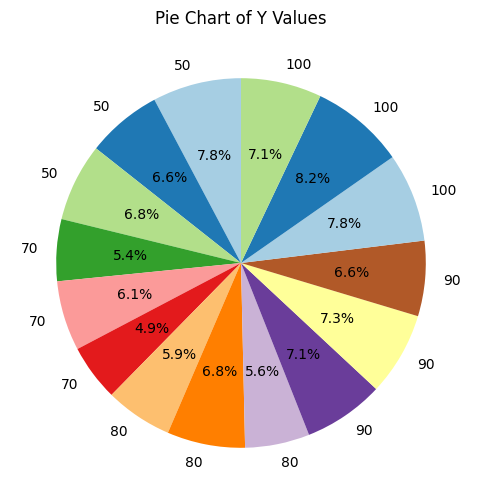

In [20]:
import pandas as pd

df = pd.DataFrame({ "x" : x , "y" : y})
grouped = df.groupby('x').sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(y, labels=x, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Pie Chart of Y Values")
plt.show()


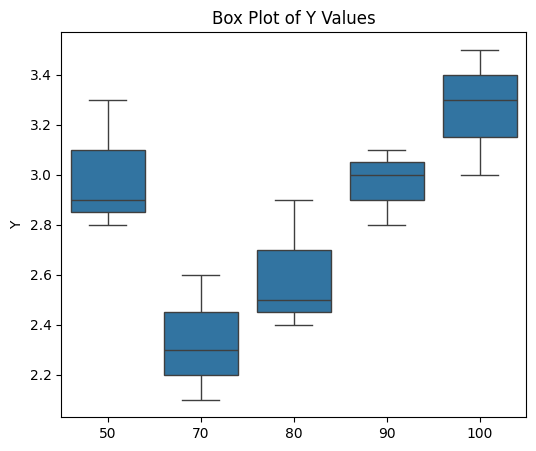

In [31]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=x, y=y)
plt.title("Box Plot of Y Values")
plt.ylabel("Y")
plt.show()

#### Polynomial

In [22]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_ = poly.fit_transform(x_reshape)
model = LinearRegression().fit(x_, y)

In [23]:
r_sq = model.score(x_, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_[0]}")

coefficient of determination: 0.6732052768464262
intercept: 7.960481099656357
slope: -0.15371134020618546


In [24]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)  # Generate smooth x values, 100 data
x_range_poly = poly.transform(x_range)  # Transform to polynomial features

In [25]:
y_pred_poly = model.predict(x_range_poly) # use x_range
print(f"predicted response:\n{y_pred_poly}")

predicted response:
[2.96391753 2.9408832  2.91839759 2.8964607  2.87507253 2.85423309
 2.83394236 2.81420035 2.79500707 2.7763625  2.75826665 2.74071953
 2.72372112 2.70727144 2.69137047 2.67601823 2.6612147  2.6469599
 2.63325381 2.62009645 2.6074878  2.59542788 2.58391668 2.57295419
 2.56254043 2.55267539 2.54335907 2.53459146 2.52637258 2.51870242
 2.51158098 2.50500826 2.49898425 2.49350897 2.48858241 2.48420457
 2.48037545 2.47709505 2.47436337 2.47218041 2.47054617 2.46946065
 2.46892385 2.46893577 2.46949642 2.47060578 2.47226386 2.47447066
 2.47722618 2.48053042 2.48438339 2.48878507 2.49373547 2.4992346
 2.50528244 2.511879   2.51902429 2.52671829 2.53496102 2.54375246
 2.55309263 2.56298151 2.57341912 2.58440544 2.59594049 2.60802425
 2.62065674 2.63383795 2.64756787 2.66184652 2.67667389 2.69204997
 2.70797478 2.72444831 2.74147056 2.75904152 2.77716121 2.79582962
 2.81504675 2.8348126  2.85512717 2.87599046 2.89740247 2.9193632
 2.94187265 2.96493082 2.98853771 3.01269332 

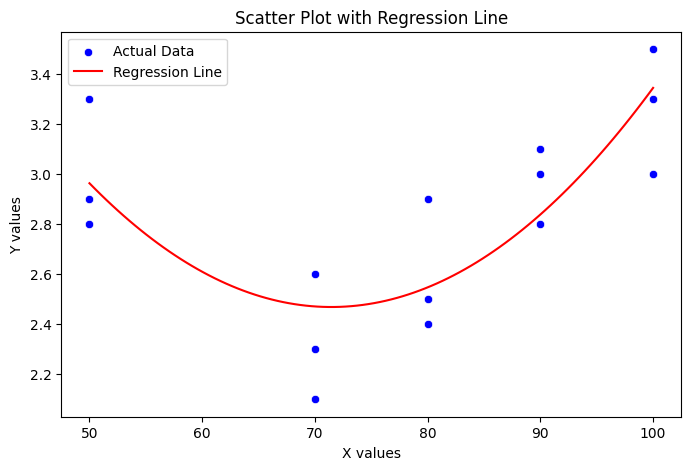

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=x.flatten(), y=y, label="Actual Data", color="blue")
plt.plot(x_range.flatten(), y_pred_poly, color="red", label="Regression Line")  # Regression line, use x_range with 100 data and

# Labels & Title
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Scatter Plot with Regression Line")
plt.legend()
plt.show()